**Author**: Fabrizio Lucero Fernández. https://www.linkedin.com/in/fabrizio-lucero/

<font size="4.5">**Data Analytics in the Sports World: Assesing 2017/2018 English Premier League Data through Machine Learning**</font>

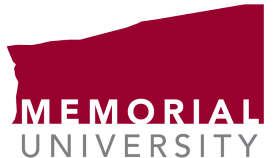

**Libraries**: Appart from the usual libraries we have been using throughout the project now we added the confusion matrix from ```sk_learn.metrics```

In [1]:
import import_ipynb
import definitions as ds
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix

importing Jupyter notebook from definitions.ipynb


Reading Level 2 xlsx file, and adding the opposition statistics for a deeper analysis. 

In [13]:
#Charging Datasets for analysis
#Level 1 (Fixing match Id for accounting both teams in the match.)
Level2=pd.read_excel('Level2.xlsx')

#Showing results after connecting opposition stats to compare with performance.
Level2_df=ds.Opposites_To(Level2)

#for just now, keeping out team Id indicator
notsearchfor=['teamId_x','teamId_y','matchId_x','matchId_y','Others','shot','Goalkeeper','Save attempt','Shot']
              #,'Save attempt','Goalkeeper','Others','Shot']
Level2_df=Level2_df.drop(Level2_df.columns[Level2_df.columns.str.contains('')==Level2_df.columns.str.contains('|'.join(notsearchfor))],axis=1)

**Model Try-Out**: Trying out different model that could work well with classifying 1- Victory 0 - Draw/Defeat. Selection of 6 models, using ```GridSearchCV``` evaluating different parameters for each model depending on the matchweeks and stats from matches in the train set. 

In this case evaluated test window is moving, if "Final Matchweek" analyzed is f.ex: 30, test set will consist of the 3 following matchweek matches. Matches from MW: 31, 32, 33.
<br>
**Transformation_ByOrder function:** with the following parameters... 
>-**X**: Dataset of events to be transformed.
<br>
>-**Origin**: Index of the start of the analyzed set of events. 
<br>
>-**Border**: Index of the end of the analyzed set of events. 
<br>
>-**Test**: Index length of the test set of events. 

*For more info visit this link:*
<br>
**Modelling function**: with the following parameters...
>**x**: feature train set to be modeled.
<br>
>**y**: target train set to be modeled.
<br>
>**xt**: feature test set to be modeled.
<br>
>**yt**: target test set to be modeled.
<br>

*For more info visit this link:*

In [4]:
#using Modelling function. Trying out grid search over models such as Softmax Regression, XGB, Random Forest, SGD and SVC. 
#For more details look over definitions.ipynb file.

model_df = []
i=0
for i in range (1,20):
    #Initializing train and test sets and showing first results. 
    x_train1, y_train1, x_test1, y_test1=ds.Transformation_ByOrder(Level2_df,ds.Mweeks_Y,ds.Mweeks_Z,[60])
    Data=ds.Modelling(x_train1, y_train1, x_test1, y_test1)
    #appending obtained data into an array
    model_df.append(Data['Results'])
    i=i+1
    

#Creating the dataframe.
model_df = pd.concat(model_df).reset_index().drop('index',axis=1)  


#showing results.
model_df.groupby(['Model']).mean()

Start Matchweek:  12.0 Final Matchweek:  27.0
Start Matchweek:  30.0 Final Matchweek:  35.0
Start Matchweek:  3.0 Final Matchweek:  23.0
Start Matchweek:  9.0 Final Matchweek:  24.0
Start Matchweek:  2.0 Final Matchweek:  22.0
Start Matchweek:  0.0 Final Matchweek:  25.0
Start Matchweek:  27.0 Final Matchweek:  32.0
Start Matchweek:  8.0 Final Matchweek:  23.0
Start Matchweek:  8.0 Final Matchweek:  33.0
Start Matchweek:  10.0 Final Matchweek:  15.0
Start Matchweek:  1.0 Final Matchweek:  21.0
Start Matchweek:  17.0 Final Matchweek:  27.0
Start Matchweek:  28.0 Final Matchweek:  33.0
Start Matchweek:  8.0 Final Matchweek:  13.0
Start Matchweek:  25.0 Final Matchweek:  30.0
Start Matchweek:  9.0 Final Matchweek:  19.0
Start Matchweek:  8.0 Final Matchweek:  28.0
Start Matchweek:  18.0 Final Matchweek:  28.0
Start Matchweek:  10.0 Final Matchweek:  35.0


,Training F1 Score,Training Accuracy,Testing F1 Score,Testing Accuracy
Model,,,,
Random Forest,0.770087,0.781404,0.699477,0.725439
SGD Classifier,0.778743,0.780377,0.712492,0.714912
SVM Classifier,0.799662,0.803316,0.704086,0.739474
Softmax Regression,0.803456,0.806254,0.732640,0.742105
Voting Classifier,0.784358,0.797605,0.685849,0.723684
XG Boost,0.830764,0.833219,0.726580,0.736842


Proceeding to evaluate two different models ( with best accuracy for the data...). First run with ```XGBClassifier()``` and Second run with ```LogisticRegression()```

**FIRST RUN (XGBOOST)**

In [ ]:
#best classifier
# Training and testing sets (random)
x_train, y_train, x_test, y_test=ds.Transformation_ByOrder(Level2_df,[0],[380],[60])

##parameters for GridSearch
parameters = {'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],'n_estimators': [40,50],'max_depth': [2, 3, 4,None],
              'colsample_bytree': [0.2,0.3,0.5,0.6,0.8],'alpha': [1e-5] }
##creating a scorer for the model
f1_scorer=ds.make_scorer(ds.f1_score, pos_label=1, average='weighted')

#Grid Search
XGB_fit=ds.xgb.XGBClassifier(eval_metric='mlogloss')
grid_obj = ds.GridSearchCV(XGB_fit, scoring=f1_scorer, param_grid=parameters,cv=5).fit(x_train,y_train, eval_metric='mlogloss')

##Obtaining best Estimator
xgb_clf=grid_obj.best_estimator_
#feature importance
fit_coef=xgb_clf.feature_importances_
print('Model Classifier: ', xgb_clf)

Use of the `Iteration_by_Matchweeks` function. 
<br>
**Iteration_by_Matchweeks function:** Accounts for the following parameters..
<br>
>**Level_Dataset**: Dataset of grouped events at the selected level. 1,2 or 3.
<br>
>**Classifier**: Selected classifier to model.
<br>
>**Importance**: feature importance
<br>
>**Iterations**: 'int', # of iterations

*For more info visit the link:*

In [14]:
#XGB Results
XGBdf=ds.Iteration_by_Matchweeks(Level2_df, xgb_clf,fit_coef,100)
XGBdf.groupby(['top n_features'])['accuracy in test', 'F1 Score'].mean().sort_values(by='accuracy in test',ascending=False)

Start Matchweek:  0.0 Final Matchweek:  19.0
Model Classifier:  XGBClassifier(alpha=1e-05, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=9.99999975e-06, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
Start Matchweek:  19.0 Final Matchweek:  29.0
Start Matchweek:  8.0 Final Matchweek:  28.0
Start Matchweek:  18.0 Final Matchweek:  33.0
Start Matchweek:  8.0 Final Matchweek:  13.0
Start Matchweek:  10.0 Final Matchweek:  15.0
Start Matchweek:  6.0 Final Matchweek:  31.0
Start Ma

,accuracy in test,F1 Score
top n_features,,
33,0.693833,0.673037
34,0.693333,0.675101
17,0.689667,0.670279
22,0.689500,0.672614
24,0.689000,0.668721
30,0.688333,0.670169
23,0.687500,0.669801
32,0.687000,0.667753
16,0.686000,0.667581


After getting results we want to evaluate which were the most important features that accounted for a better model accuracy. By using ```matplotlib.pyplot``` we can generate a Horizonal Bar graph with results.

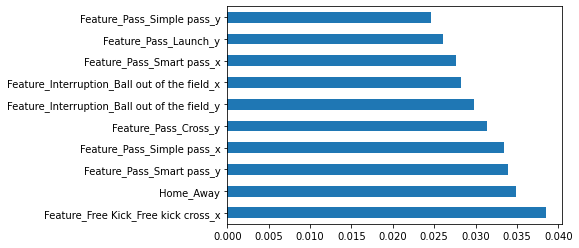

In [15]:
feat_importances =pd.Series(fit_coef, index=x_train.columns)
data=np.power(feat_importances,2)
dataSq=data.nlargest(10)
Xtop=dataSq.index.tolist()

#visualization of feature importance
feat_importances[Xtop].plot(kind='barh')
ds.plt.show()


**SECOND RUN (Logistic Regression)**

In [16]:
#best classifier
## Training and testing sets
#19 first games
x_train2, y_train2, x_test2, y_test2=ds.Transformation_ByOrder(Level2_df,[0],[380],[100])

#Logistic Regression
##Parameters
modelLR= ds.LogisticRegression()
m_class=['auto','ovr','multinomial']
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
gridLR= dict(multi_class=m_class,solver=solvers,penalty=penalty,C=c_values)
cvLR= ds.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_searchLR= ds.GridSearchCV(estimator=modelLR, param_grid=gridLR, n_jobs=-1, cv=cvLR, scoring='accuracy',error_score=0)
softmax_grid = grid_searchLR.fit(x_train2, y_train2)

#best estimator for the grid search
softmax_reg= softmax_grid.best_estimator_
#feature importance
coefficients=softmax_reg.coef_[0]
print('Model Classifier: ', softmax_reg)

LRdf=ds.Iteration_by_Matchweeks(Level2_df, softmax_reg,coefficients,100)
LRdf.groupby(['top n_features'])['accuracy in test', 'F1 Score'].mean().sort_values(by='accuracy in test',ascending=False)

Start Matchweek:  0.0 Final Matchweek:  19.0
Model Classifier:  LogisticRegression(C=10, penalty='l1', solver='liblinear')
Start Matchweek:  8.0 Final Matchweek:  33.0
Start Matchweek:  14.0 Final Matchweek:  34.0
Start Matchweek:  1.0 Final Matchweek:  26.0
Start Matchweek:  13.0 Final Matchweek:  33.0
Start Matchweek:  7.0 Final Matchweek:  17.0
Start Matchweek:  22.0 Final Matchweek:  32.0
Start Matchweek:  12.0 Final Matchweek:  32.0
Start Matchweek:  0.0 Final Matchweek:  15.0
Start Matchweek:  7.0 Final Matchweek:  12.0
Start Matchweek:  3.0 Final Matchweek:  8.0
Start Matchweek:  16.0 Final Matchweek:  31.0
Start Matchweek:  20.0 Final Matchweek:  35.0
Start Matchweek:  27.0 Final Matchweek:  32.0
Start Matchweek:  7.0 Final Matchweek:  32.0
Start Matchweek:  2.0 Final Matchweek:  7.0
Start Matchweek:  4.0 Final Matchweek:  19.0
Start Matchweek:  1.0 Final Matchweek:  11.0
Start Matchweek:  16.0 Final Matchweek:  31.0
Start Matchweek:  7.0 Final Matchweek:  17.0
Start Matchweek:

,accuracy in test,F1 Score
top n_features,,
24,0.725667,0.723467
23,0.722500,0.720400
25,0.714333,0.712927
33,0.713500,0.711448
26,0.711500,0.710245
4,0.711167,0.685893
27,0.709833,0.707716
5,0.709500,0.685692
36,0.707833,0.705061


After getting results we want to evaluate which were the most important features that accounted for a better model accuracy. By using ```matplotlib.pyplot``` we can generate a Horizonal Bar graph with results. ```sklearn.metrics``` creates a confusion matrix which guide us into knowing how the classifier works in every specific case.

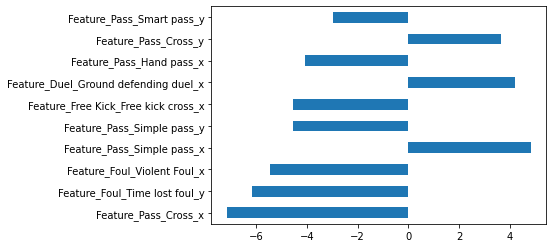

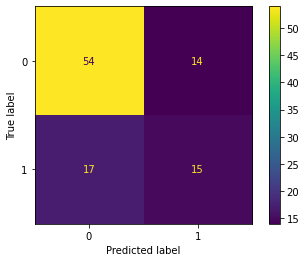

In [17]:
#Feature importances and the feature names assigned. 
feat_importances =pd.Series(coefficients, index=x_train2.columns)

#in order to get both negative and possitives as equal, we transform to the power of 2.
data=np.power(feat_importances,2)
dataSq=data.nlargest(10)
Xtop=dataSq.index.tolist()

#visualization of feature importance
feat_importances[Xtop].plot(kind='barh')
ds.plt.show()

x_test_new=x_train2[Xtop]
model_clf=softmax_reg
#confusion matrix
plot_confusion_matrix(model_clf, x_test_new, y_test2)  
ds.plt.show()

In this case by having more depth inside the features, the classifier managed to raise it's accuracy of assigning when a team won up to 46.9%. The other case ( when a team lose - (0)) get 79.4% accuracy, with the most important feature being the amount of crosses made during the game. A team crossing too much can be a disadvantage for open play strategy and goal building. As we search through literature we found that some studies have been made in the subject: Crossing in Soccer has a Strong Negative Impact on Scoring: Evidence from the English Premier League the German Bundesliga and the World Cup 2014

![emery.pg](emery.jpg "Title")

**Link to Original Dataset documentation**:
    https://figshare.com/collections/Soccer_match_event_dataset/4415000/5

**Published article from where Dataset was retrieved**:
Pappalardo, L., Cintia, P., Rossi, A., Massucco, E., Ferragina, P., Pedreschi, D., &amp; Giannotti, F. (2019). A public data  set of spatio-temporal match events in soccer competitions. Scientific Data, 6(1). https://doi.org/10.1038/s41597-019-0247-7 